<a href="https://colab.research.google.com/github/amisq987/Bank-loan/blob/main/Bank_Loan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [74]:
df = pd.read_csv('/content/financial_loan.csv')
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [76]:
df.isnull().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,1438
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [77]:
# Handle missing values in emp_title (employment title)
df['emp_title'].fillna('Not Provided', inplace=True)

<ipython-input-77-c72f18909715>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
# Remove leading/trailing whitespaces from objects
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert date columns to datetime
date_cols = ['issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')

# Clean interest rate (remove % and convert to decimal)
df['int_rate'] = df['int_rate'].astype(str).str.replace('%', '').astype(float) / 100

# Convert loan_status to categorical
df['loan_status'] = df['loan_status'].astype('category')

# One-hot encoding term column
df['term_36_months'] = np.where(df['term'] == '36 months', 1, 0)

# Simplification emp_length column
df['emp_length'] = pd.to_numeric(df['emp_length'].str.replace('<', '', regex=False).str[:2].str.strip(), errors='coerce')

In [80]:
def get_sorted_unique_counts(df):
    # Select columns with categorical data
    object_cols = df.select_dtypes(include=['object', 'category']).columns

    # Get the number of unique entries in each categorical column
    object_nunique = {col: df[col].nunique() for col in object_cols}

    # Convert to DataFrame and sort by unique counts
    unique_counts = pd.DataFrame(list(object_nunique.items()), columns=['Column', 'Unique Count'])
    unique_counts = unique_counts.sort_values(by='Unique Count').reset_index(drop=True)

    return unique_counts

get_sorted_unique_counts(df)

,Column,Unique Count
0,application_type,1
1,term,2
2,verification_status,3
3,loan_status,3
4,home_ownership,5
5,grade,7
6,purpose,14
7,sub_grade,35
8,address_state,50
9,emp_title,28523


In [81]:
def value_counter(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(["object"]).columns:
        print(df[col].value_counts(dropna = False))

value_counter(df)

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
MT      79
WY      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: count, dtype: int64
application_type
INDIVIDUAL    38576
Name: count, dtype: int64
emp_title
Not Provided                         1438
US Army                               135
Bank of America                       109
IBM                                    67
AT&T                                   63
                                     ... 
Millis Transfer Inc.                    1
SCHOOLSFIRST FEDERAL CREDIT UNION       1
g

In [82]:
# Create a new column for loan purpose category (simplifying the purpose)
purpose_mapping = {
    'car': 'vehicle',
    'Debt consolidation': 'debt consolidation',
    'credit card': 'credit card',
    'home improvement': 'home improvement',
    'other': 'other',
    'major purchase': 'major purchase',
    'medical': 'medical',
    'small business': 'business',
    'vacation': 'personal',
    'moving': 'personal',
    'house': 'housing',
    'renewable energy': 'home improvement',
    'wedding': 'personal'
}
df['purpose_category'] = df['purpose'].map(lambda x: purpose_mapping.get(x, 'other'))

In [83]:
print("\nData after cleaning:")
display(df.head())


Data after cleaning:


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,term_36_months,purpose_category
0,1077430,GA,INDIVIDUAL,1,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,Source Verified,30000.0,0.0100,59.83,0.001527,2500,4,1009,0,vehicle
1,1072053,CA,INDIVIDUAL,9,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,Source Verified,48000.0,0.0535,109.43,0.001864,3000,4,3939,1,vehicle
2,1069243,CA,INDIVIDUAL,4,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,Not Verified,50000.0,0.2088,421.65,0.001596,12000,11,3522,1,vehicle
3,1041756,TX,INDIVIDUAL,1,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,Source Verified,42000.0,0.0540,97.06,0.001065,4500,9,4911,0,vehicle
4,1068350,IL,INDIVIDUAL,10,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,Verified,83000.0,0.0231,106.53,0.000603,3500,28,3835,1,vehicle


In [84]:
num_cols = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
print("Numerical Columns Statistics:")
display(df[num_cols].describe())

Numerical Columns Statistics:


,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.964454e+04,0.133274,326.862965,0.001205,11296.066855,22.132544,12263.348533
std,6.429368e+04,0.066662,209.092000,0.000372,7460.746022,11.392282,9051.104777
min,4.000000e+03,0.000000,15.690000,0.000542,500.000000,2.000000,34.000000
25%,4.150000e+04,0.082100,168.450000,0.000932,5500.000000,14.000000,5633.000000
50%,6.000000e+04,0.134200,283.045000,0.001186,10000.000000,20.000000,10042.000000
75%,8.320050e+04,0.185900,434.442500,0.001459,15000.000000,29.000000,16658.000000
max,6.000000e+06,0.299900,1305.190000,0.002459,35000.000000,90.000000,58564.000000


In [85]:
# Categorical columns statistics
cat_cols = ['application_type', 'grade', 'home_ownership', 'purpose', 'sub_grade', 'term', 'verification_status', 'loan_status']
print("\nCategorical Columns Value Counts:")
for col in cat_cols:
    print(f"\n{col}:")
    display(df[col].value_counts(normalize=True).head(10))


Categorical Columns Value Counts:

application_type:


,proportion
application_type,
INDIVIDUAL,1.0



grade:


,proportion
grade,
B,0.302623
A,0.251167
C,0.204894
D,0.134332
E,0.072221
F,0.026649
G,0.008114



home_ownership:


,proportion
home_ownership,
RENT,0.477991
MORTGAGE,0.445821
OWN,0.073569
OTHER,0.002540
NONE,0.000078



purpose:


,proportion
purpose,
Debt consolidation,0.472159
credit card,0.129562
other,0.099129
home improvement,0.074554
major purchase,0.054697
small business,0.046039
car,0.038807
wedding,0.024056
medical,0.017291



sub_grade:


,proportion
sub_grade,
B3,0.073465
A4,0.072662
A5,0.068799
B5,0.068540
B4,0.063641
C1,0.054153
B2,0.051586
C2,0.051120
B1,0.045391



term:


,proportion
term,
36 months,0.731984
60 months,0.268016



verification_status:


,proportion
verification_status,
Not Verified,0.426794
Verified,0.319758
Source Verified,0.253448



loan_status:


,proportion
loan_status,
Fully Paid,0.833290
Charged Off,0.138247
Current,0.028463


<ipython-input-90-2863680be2ad>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




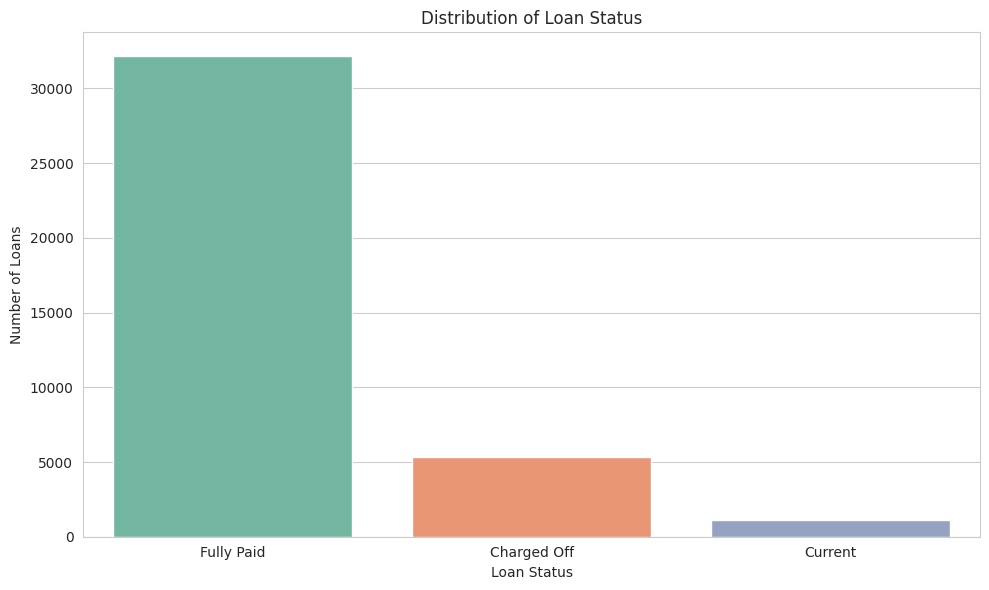

<ipython-input-90-2863680be2ad>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




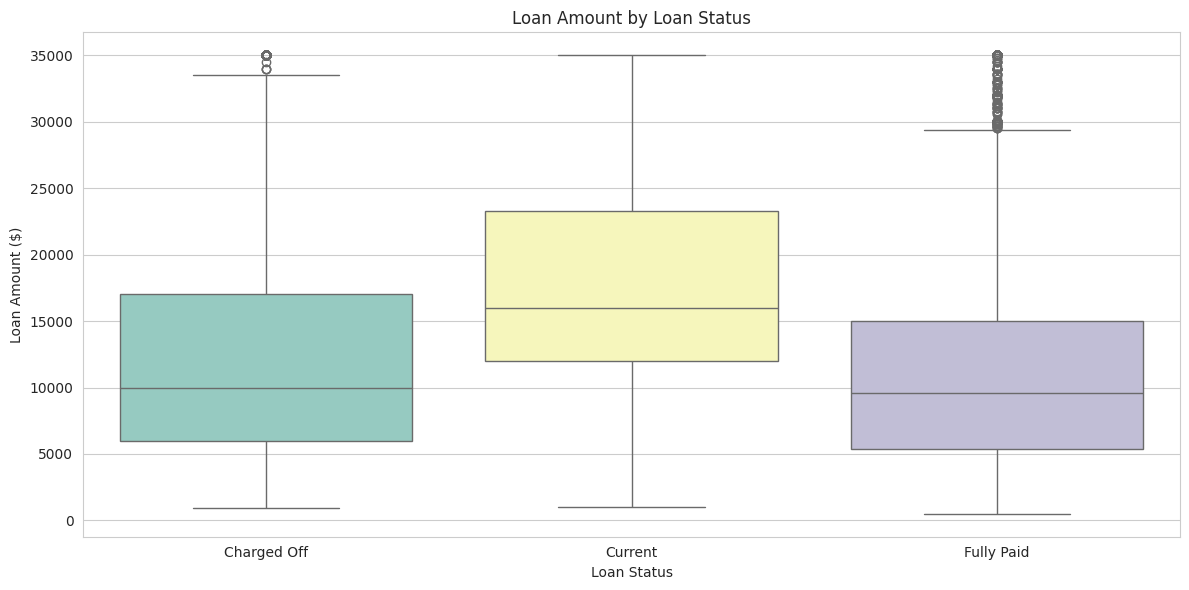

<ipython-input-90-2863680be2ad>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




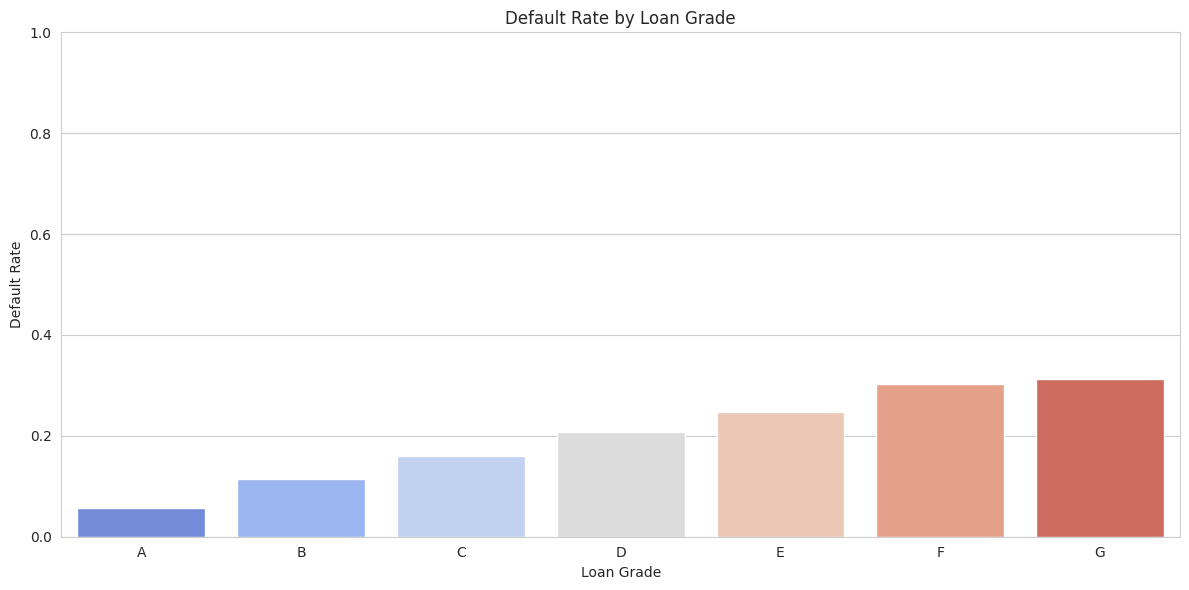

In [90]:
# Loan status distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='loan_status',
    order=df['loan_status'].value_counts().index,
    palette='Set2'  # Soft pastel colors
)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.tight_layout()
plt.show()

# Loan status by loan amount
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='loan_status',
    y='loan_amount',
    palette='Set3'  # Muted and diverse color palette
)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.tight_layout()
plt.show()

# Default rate by grade
default_rate = df.groupby('grade')['loan_status'].apply(lambda x: (x == 'Charged Off').mean()).reset_index()
default_rate.rename(columns={'loan_status': 'default_rate'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=default_rate,
    x='grade',
    y='default_rate',
    palette='coolwarm'  # Gradient from cool (low) to warm (high)
)
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.ylim(0, 1)  # Ensure consistent scale for default rates
plt.tight_layout()
plt.show()

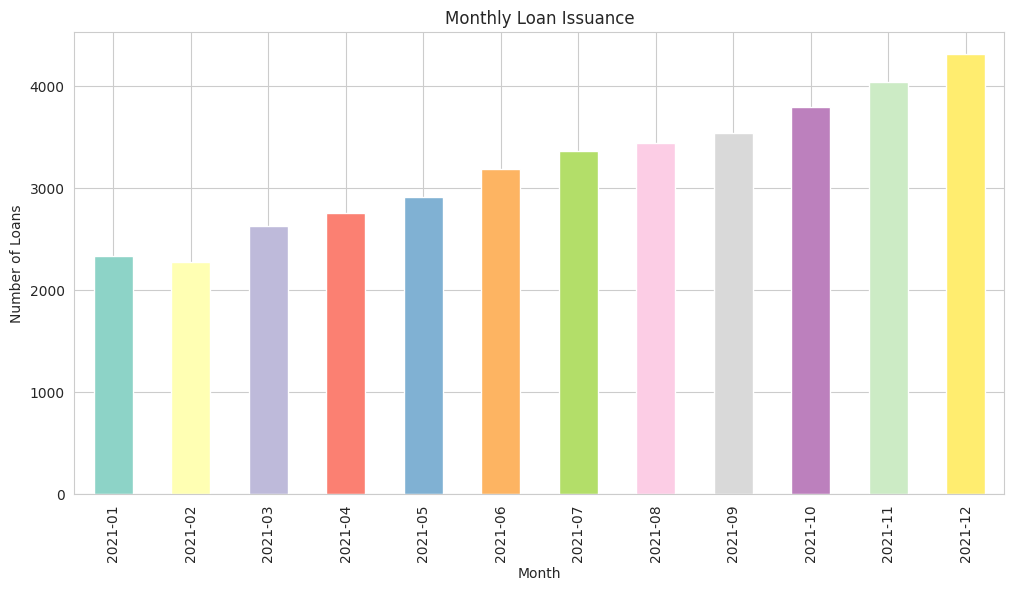

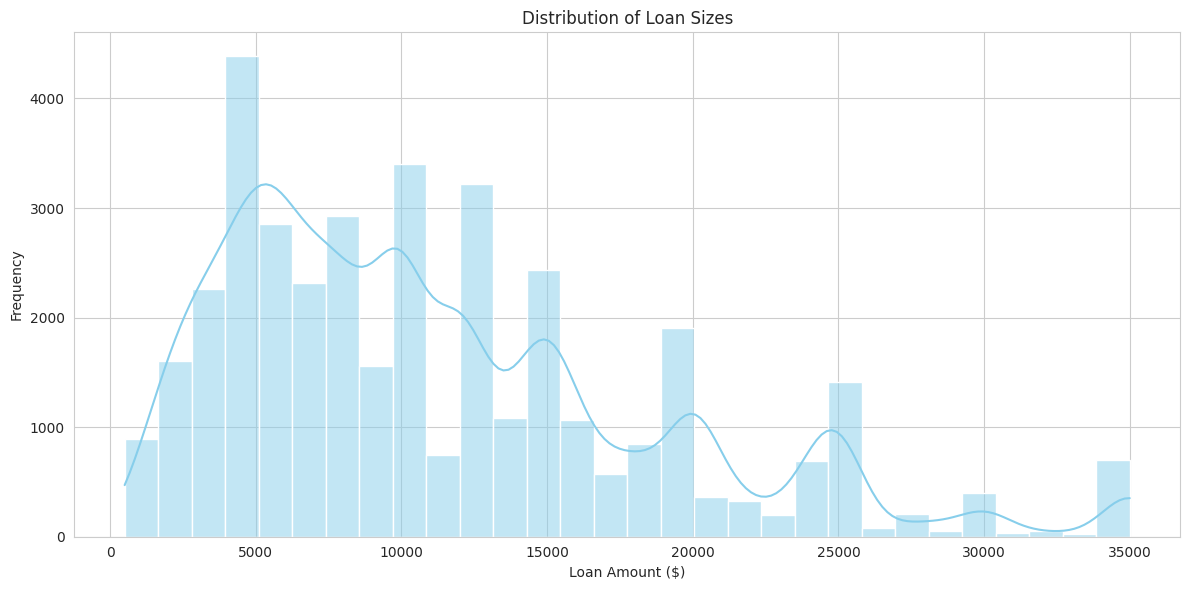

<ipython-input-87-74f265ba12ba>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




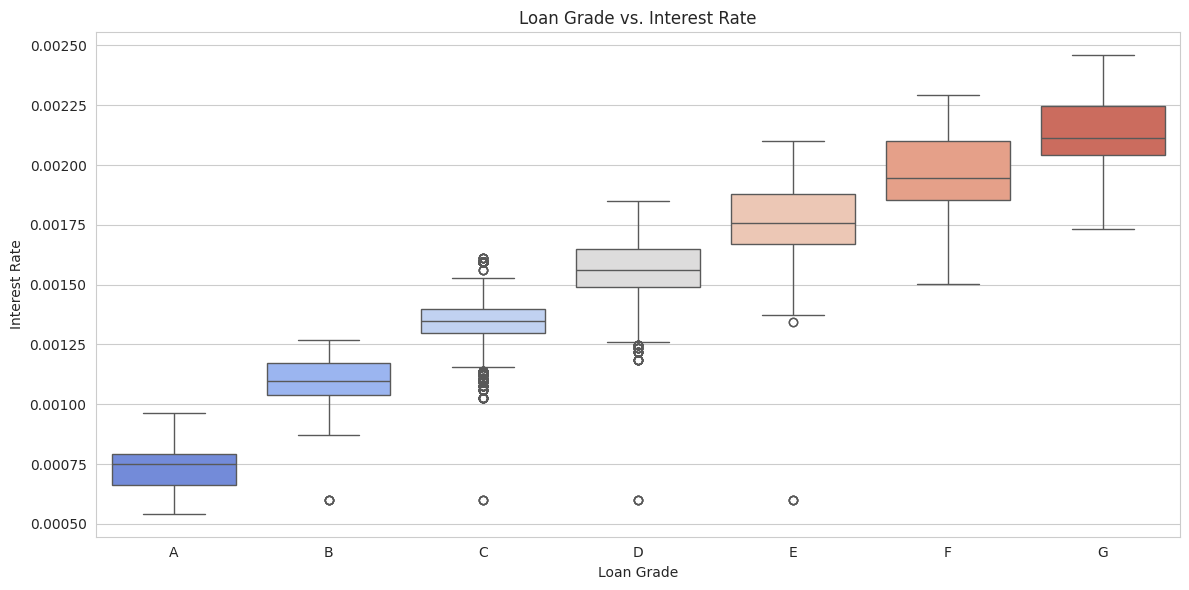

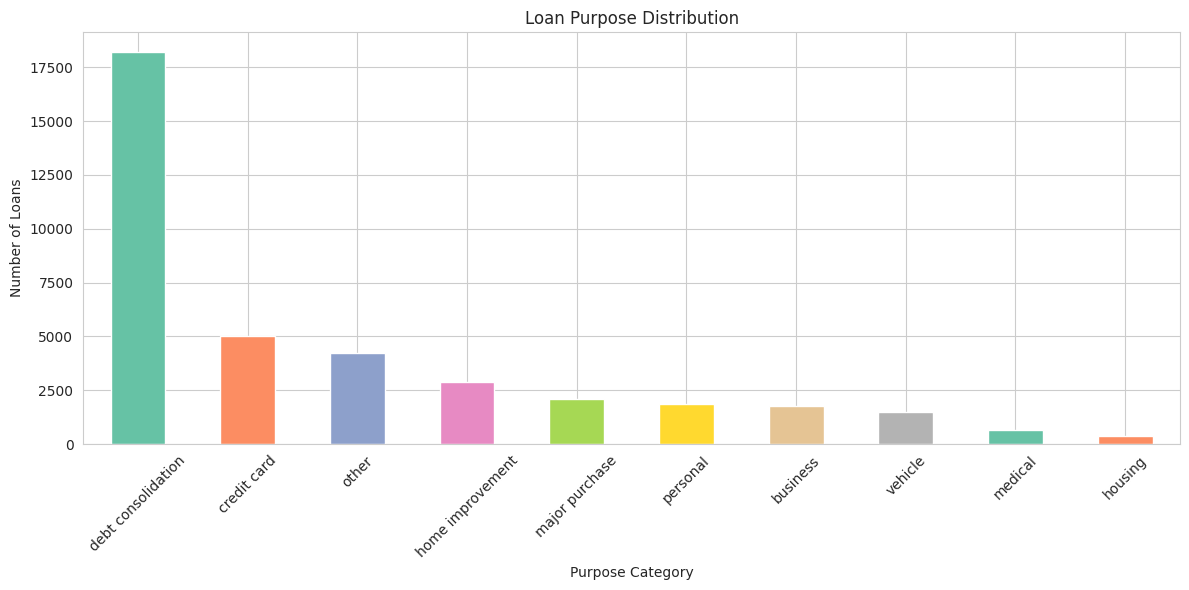

In [87]:
# Extract year-month for monthly analysis
df['issue_month'] = df['issue_date'].dt.to_period('M').astype(str)

# Loan issuance over time (by month)
loans_by_month = df['issue_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
loans_by_month.plot(kind='bar', color=sns.color_palette('Set3'))
plt.title('Monthly Loan Issuance')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.show()

#Loan Amount Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x='loan_amount',
    bins=30,
    kde=True,
    color='skyblue'  # Soft and clean tone for distribution
)
plt.title('Distribution of Loan Sizes')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Interest Rate by Loan Grade
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='grade',
    y='int_rate',
    order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    palette='coolwarm'  # Gradient from low to high risk visually aligned with rate
)
plt.title('Loan Grade vs. Interest Rate')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.tight_layout()
plt.show()

#Loan Purpose Distribution
plt.figure(figsize=(12, 6))
df['purpose_category'].value_counts().plot(
    kind='bar',
    color=sns.color_palette('Set2')  # Visually balanced and distinct categories
)
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose Category')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [92]:
# Count loans by state
loan_counts = df['address_state'].value_counts().reset_index()
loan_counts.columns = ['state', 'loan_count']

# Create a choropleth map
fig = px.choropleth(
    loan_counts,
    locations='state',        # State abbreviations
    locationmode='USA-states',
    color='loan_count',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'loan_count': 'Number of Loans'},
    hover_name='state',
    title='Loan Distribution by State'
)

fig.show()

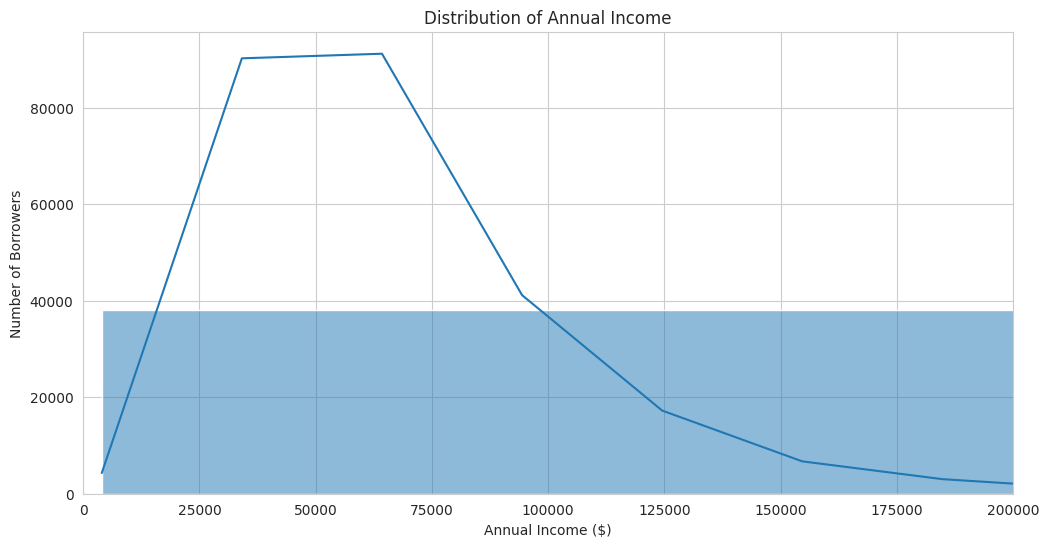

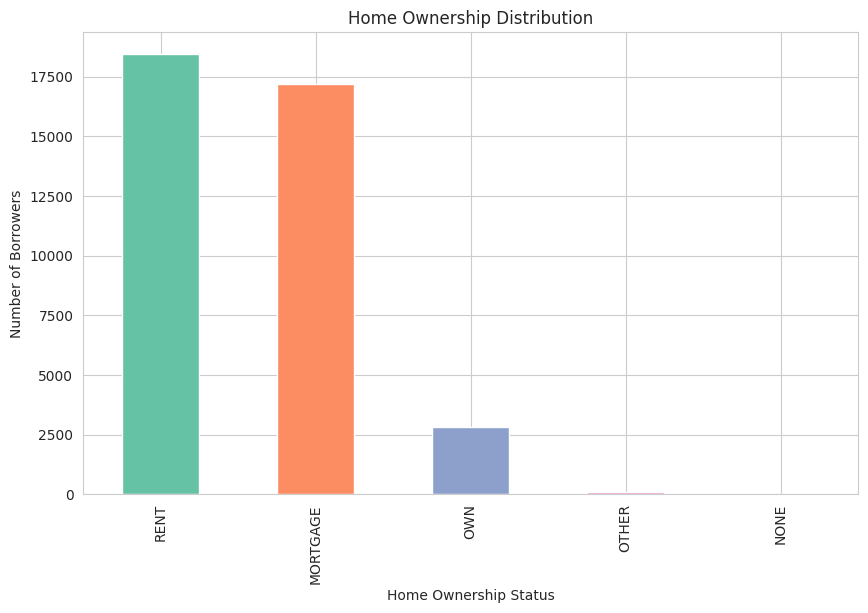

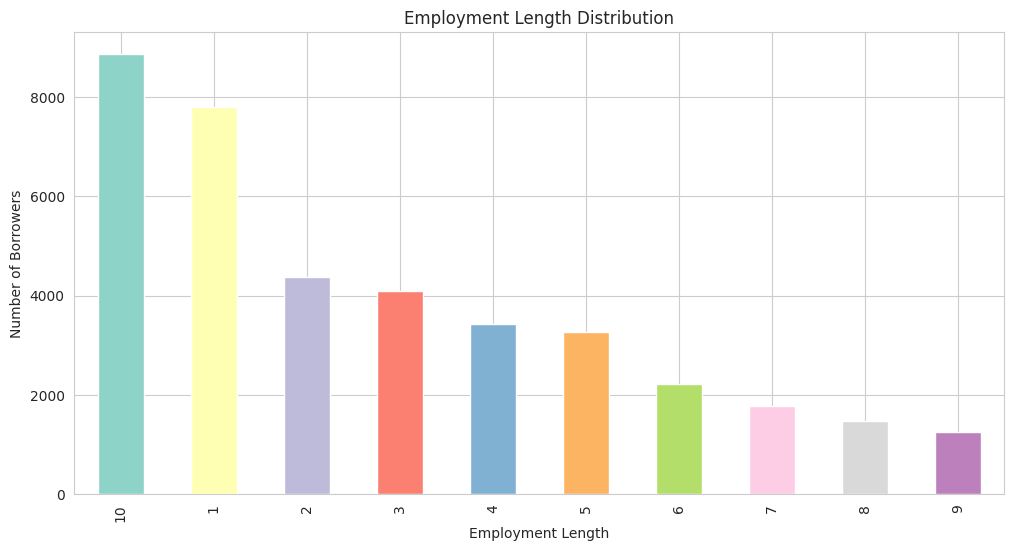

In [89]:
# Annual income distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='annual_income', bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Number of Borrowers')
plt.xlim(0, 200000)  # Remove extreme outliers for better visualization
plt.show()

# Home ownership distribution
plt.figure(figsize=(10, 6))
df['home_ownership'].value_counts().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Borrowers')
plt.show()

# Employment length distribution,
plt.figure(figsize=(12, 6))
df['emp_length'].value_counts().plot(kind='bar',color=sns.color_palette('Set3'))
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Number of Borrowers')
plt.show()